In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def Lenses2F(image,landa=1,f=1,shift=0):
  #image: Imagen que se ubica en el foco del plano objeto y pasará por la lente 
  #landa: Longitud de onda de la luente de luz que ingresa al sistema
  #f: distancia focal de la lente
  #shift: 0 si no se desea realizar un fftshit a la matriz y 1 en caso contrario
  if (shift==1):
    result = (-1j/(landa*f))*(np.fft.fftshift(np.fft.fftn(image)))
  elif (shift==0):
    result = (-1j/(landa*f))*(np.fft.fftn(image))
  return result

#Función para gráficar matrices complejas 
def Complex_Plot(matrix,kind,log,axs):
  #matrix: matriz a gráficar
  #kind: I=Intensidad, A=Amplitud, P=Fase
  #log: 1 si se desea escala logarítmica 0 en caso contrario
  if (kind=='I'):
    matrix_to_plot=np.abs(matrix)**2
  elif (kind=='A'):
    matrix_to_plot=np.abs(matrix)
  elif (kind=='P'):
     matrix_to_plot=np.angle(matrix)
  if (log==1):
    axs.imshow(np.log(matrix_to_plot + 0.0000001))
  elif (log==0):
    axs.imshow(matrix_to_plot)
  return 

#Definimos el sistema 4F a partir de las funciones que ya teniamos definidas.
def Lenses4F(image,landa,f):
    Half01=Lenses2F(image,landa,f,1) #Usamos el método de dividir el sistema 4f en dos mitades.
    Half02=Lenses2F(Half01,landa,f,0)
    return Half02

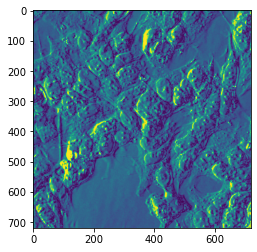

In [53]:
file = open("a.txt")
lines = file.readlines()
mat = []
for line in lines:
    lis = []
    line = line.replace("i","j").split(",")
    for elem in line:
        lis.append(complex(elem))
    mat.append(lis)
mat = np.array(mat)
Complex_Plot(np.abs(np.log(mat)),"A",0,plt)